# Note
Based on https://hautahi.com/im_greedycelf

In [1]:
import random
from igraph import *
import numpy as np

In [2]:
from diffusion_model.models import independent_cascade
from selection_strategy.strategies import greedy, celf

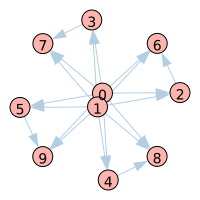

In [3]:
# Create simple network with 0 and 1 as the influential nodes

### Manually defined graph
source = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,4,5]
target = [2,3,4,5,6,7,8,9,2,3,4,5,6,7,8,9,6,7,8,9]

g = Graph(directed=True)
g.add_vertices(range(10))
g.add_edges(zip(source,target))

#### Generated Graph
# g = Graph.Erdos_Renyi(n=100,m=300,directed=True)

# Plot graph
g.vs["label"], g.es["color"], g.vs["color"] = range(10), "#B3CDE3", "#FBB4AE"
plot(g,bbox = (200,200),margin = 20,layout = g.layout("kk"))

In [4]:
# Run algorithms
celf_output = celf(g,4,independent_cascade,p = 0.2,mc = 500)
greedy_output = greedy(g,4,independent_cascade,p = 0.2,mc = 500)

# Print results
print("--- In this order: optimal seed set, resulting spread, time for each iteration + Lookups for CELF ---")
print("\ngreedy output: " + str(greedy_output) + "\n")
print("celf output:   " + str(celf_output) + "\n")

--- In this order: optimal seed set, resulting spread, time for each iteration + Lookups for CELF ---

greedy output: ([0, 1, 3, 4], [2.828, 3.828, 4.776, 5.718], [0.1282188892364502, 0.43957090377807617, 0.7657084465026855, 1.100447654724121])

celf output:   ([0, 1, 3, 4], [2.828, 3.828, 4.776, 5.718], [0.13390302658081055, 0.338864803314209, 0.547976016998291, 0.6018977165222168], [10, 6, 5, 1])

